# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import math 
import time
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset    = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset    = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

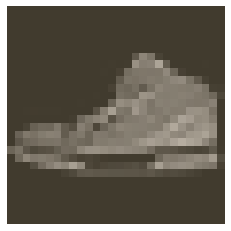

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [3]:
# TODO: Train the network here
# TODO: Define your network architecture here
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 64),    
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)
criterion = nn.NLLLoss()
optimizer = optim.Adadelta(model.parameters(), lr=0.1)
epochs = 10
for epoch in range(epochs):
    time_start = time.perf_counter()    
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()        
        output = model(images)
        loss   = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        time_taken = time.perf_counter() - time_start
        print(f"{epoch} Training loss: {running_loss/len(trainloader):.4f} in {time_taken:.1f}s")        

0 Training loss: 0.7024 in 42.8s
1 Training loss: 0.4537 in 42.1s
2 Training loss: 0.4045 in 49.0s
3 Training loss: 0.3728 in 46.5s
4 Training loss: 0.3506 in 49.2s
5 Training loss: 0.3343 in 48.2s
6 Training loss: 0.3190 in 48.0s
7 Training loss: 0.3070 in 62.7s
8 Training loss: 0.2955 in 66.4s
9 Training loss: 0.2848 in 46.7s


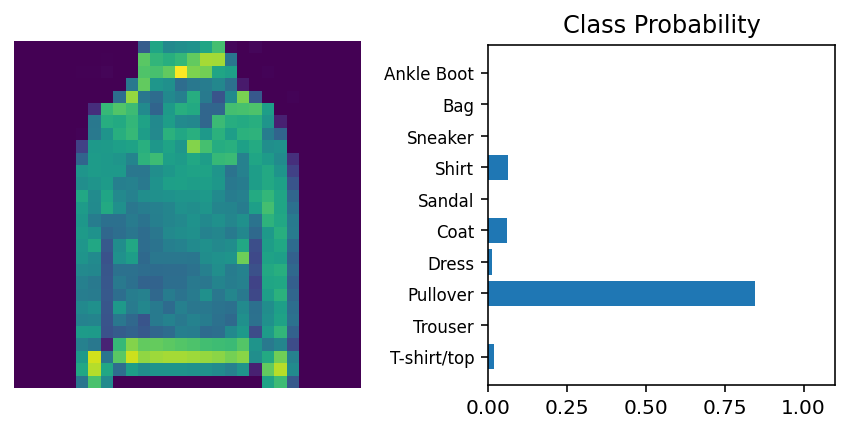

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)
    ps    = torch.exp(logps) 

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [6]:
# TODO: Train the network here
# TODO: Define your network architecture here
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),    
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),    
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epoch             = -1
running_loss      = 0
last_running_loss = math.inf
while True:    
    time_start = time.perf_counter()
    epoch += 1
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()        
        output = model(images)
        loss   = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        time_taken = time.perf_counter() - time_start
        print(f"{epoch} Training loss: {running_loss/len(trainloader):.4f} in {time_taken:.1f}s")
        if running_loss > last_running_loss*1.01:
            break
        else:
            last_running_loss = running_loss

0 Training loss: 0.6051 in 55.4s
1 Training loss: 0.4729 in 59.8s
2 Training loss: 0.4492 in 47.0s
3 Training loss: 0.4305 in 73.1s
4 Training loss: 0.4310 in 70.6s
5 Training loss: 0.4142 in 58.4s
6 Training loss: 0.4026 in 60.9s
7 Training loss: 0.4133 in 63.2s


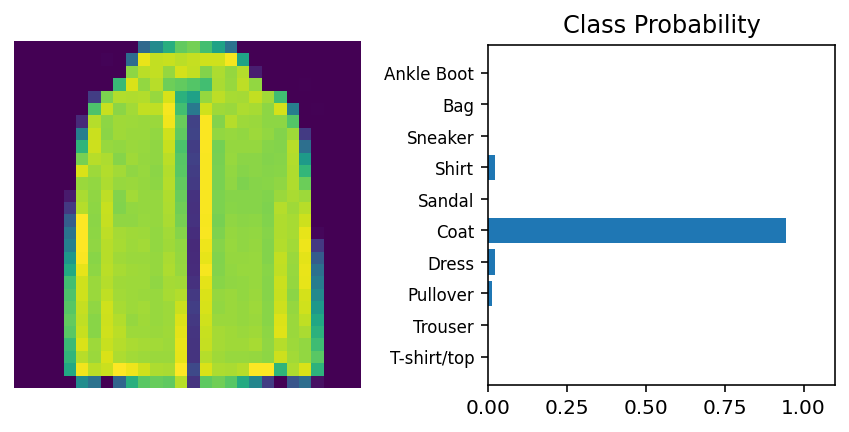

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)
    ps    = torch.exp(logps) 

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')